# 数据分析实战项目

## Python分析CDNow的用户消费行为

## 1. 数据加载和数据集形态分析

In [352]:
# 导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# 中文字符和正负号正常显示的设置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [353]:
# 建立列名
columns = ['用户', '订单时间', '订单数量','订单金额']
# 加载数据,这里注意，因为原始数据不含表头，所以需要添加
# 如果直接读取的话，需要添加header=None
df = pd.read_table('./CDNOW.txt', names=columns, sep='\s+')

In [354]:
# 检查数据集读入是否有误
# 查看数据前五行
df.head()

,用户,订单时间,订单数量,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [355]:
# 查看数据后五行
df.tail()

,用户,订单时间,订单数量,订单金额
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12
69658,23570,19970326,2,42.96


In [356]:
df['订单日期'] = pd.to_datetime(df['订单时间'], format='%Y%m%d')
df['订单月份'] = df['订单日期'].values.astype('datetime64[M]')

In [357]:
df.head()

,用户,订单时间,订单数量,订单金额,订单日期,订单月份
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [358]:
# 描述性统计分析
df.describe()

,用户,订单时间,订单数量,订单金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [359]:
# 查看数据是否存在空值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
用户      69659 non-null int64
订单时间    69659 non-null int64
订单数量    69659 non-null int64
订单金额    69659 non-null float64
订单日期    69659 non-null datetime64[ns]
订单月份    69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


## 2. 商品销售静态分析

In [360]:
# 各订单购买数量和各订单购买金额分析
df[['订单数量','订单金额']].describe()

,订单数量,订单金额
count,69659.000000,69659.000000
mean,2.410040,35.893648
std,2.333924,36.281942
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


用户平均各订单购买2.4个商品，标准差2.3，稍微具有波动性，中位数在2个商品，75分位数在3个商品，说明绝大部分订单购买量不多，最大单次购买是99个，数字还是比较高。各订单购买金额和购买数量差不多。

## 3. 商品销售动态分析

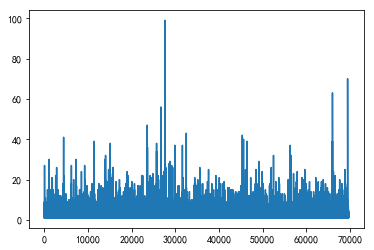

In [361]:
# 订单数量趋势分析
df['订单数量'].plot()

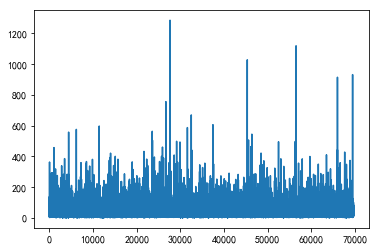

In [362]:
# 订单金额趋势分析
df['订单金额'].plot()

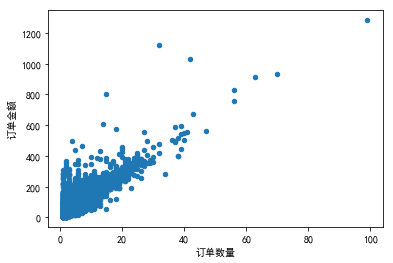

In [363]:
# 异常值检测，坐标轴怎么显示中文
df.plot.scatter(x='订单数量', y='订单金额')

## 4. 用户消费行为静态分析

### 4.1各用户购买数量分析

In [364]:
# 各用户累计购买数量分析
df['订单数量'].groupby(df['用户']).sum().to_csv('各用户累计购买数量.csv')
print("各用户累计购买数量：\n{}".format(df['订单数量'].groupby(df['用户']).sum()))
print('-' * 50)
print('-' * 50)
print("各用户累计购买数量分析：\n{}".format(df['订单数量'].groupby(df['用户']).sum().describe()))
print('-' * 50)
print('-' * 50)


# 各用户最大单笔购买数量分析
df['订单数量'].groupby(df['用户']).max().to_csv('各用户最大单笔购买数量.csv')
print("各用户累计购买数量：\n{}".format(df['订单数量'].groupby(df['用户']).max()))
print('-' * 50)
print('-' * 50)


# 应用apply方法计算各用户的购买贡献率
df1 = df.copy()
acount_sum = df['订单数量'].sum()
print("累积购买数量：{}".format(acount_sum))
print('-' * 50)
print('-' * 50)
user_acount_con = df['订单数量'].groupby(df['用户']).sum().apply(lambda x: x / acount_sum)
user_acount_con.to_csv('各用户购买数量累积贡献率.csv')
print(user_acount_con)
print('-' * 50)
print('-' * 50)
user_acount_con.describe()

各用户累计购买数量：
用户
1         1
2         6
3        16
4         7
5        29
6         1
7        18
8        18
9         6
10        3
11        4
12        4
13        4
14        2
15        4
16        8
17        5
18        1
19       11
20       46
21        4
22        1
23        2
24        4
25       12
26        6
27       10
28        7
29       28
30        2
         ..
23541     2
23542     5
23543     2
23544    12
23545     1
23546     1
23547     2
23548     2
23549     2
23550     2
23551    12
23552     4
23553     8
23554     3
23555    14
23556    15
23557     1
23558    11
23559     8
23560     1
23561     6
23562     2
23563     3
23564     5
23565     1
23566     2
23567     1
23568     6
23569     2
23570     5
Name: 订单数量, Length: 23570, dtype: int64
--------------------------------------------------
--------------------------------------------------
各用户累计购买数量分析：
count    23570.000000
mean         7.122656
std         16.983531
min          1.000000
25%        

count    23570.000000
mean         0.000042
std          0.000101
min          0.000006
25%          0.000006
50%          0.000018
75%          0.000042
max          0.006153
Name: 订单数量, dtype: float64

### 4.2 各用户购买金额分析

In [365]:
# 各用户累计购买金额分析
df['订单金额'].groupby(df['用户']).sum().to_csv('各用户累计购买金额.csv')
print("各用户累计购买金额：\n{}".format(df['订单金额'].groupby(df['用户']).sum()))
print('-' * 50)
print('-' * 50)
print("各用户累计购买金额分析：\n{}".format(df['订单金额'].groupby(df['用户']).sum().describe()))
print('-' * 50)
print('-' * 50)


# 各用户最大单笔消费金额分析
df['订单金额'].groupby(df['用户']).max().to_csv('各用户最大单笔消费金额.csv')
print("各用户最大单笔消费金额：\n{}".format(df['订单金额'].groupby(df['用户']).max()))
print('-' * 50)
print('-' * 50)


# 各用户购买金额累积贡献率
money_sum = df['订单金额'].sum()
print("累积购买金额：{}".format(money_sum))
print('-' * 50)
print('-' * 50)
user_money_con = df['订单金额'].groupby(df['用户']).sum().apply(lambda x: x / money_sum)
user_money_con.to_csv('各用户购买金额累积贡献率.csv')
print(user_money_con)
print('-' * 50)
print('-' * 50)
user_money_con.describe()

各用户累计购买金额：
用户
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
11        58.55
12        57.06
13        72.94
14        29.92
15        52.87
16        79.87
17        73.22
18        14.96
19       175.12
20       653.01
21        75.11
22        14.37
23        24.74
24        57.77
25       137.53
26       102.69
27       135.87
28        90.99
29       435.81
30        28.34
          ...  
23541     57.34
23542     77.43
23543     50.76
23544    134.63
23545     24.99
23546     13.97
23547     23.54
23548     23.54
23549     27.13
23550     25.28
23551    264.63
23552     49.38
23553     98.58
23554     36.37
23555    189.18
23556    203.00
23557     14.37
23558    145.60
23559    111.65
23560     18.36
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: 订单金额

count    23570.000000
mean         0.000042
std          0.000096
min          0.000000
25%          0.000008
50%          0.000017
75%          0.000043
max          0.005596
Name: 订单金额, dtype: float64

### 4.3 各用户购买次数分析

In [366]:
df['订单数量'].groupby(df['用户']).count().to_csv('各用户购买次数分析.csv')
print("各用户购买次数分析：\n{}".format(df['订单数量'].groupby(df['用户']).count().describe()))

各用户购买次数分析：
count    23570.000000
mean         2.955409
std          4.736558
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: 订单数量, dtype: float64


# 5. 用户消费行为动态分析

In [367]:
# 各用户第一次购买时间分析
user_buy_first = df.groupby('用户', as_index=True).min().drop(['订单数量', '订单金额', '订单日期', '订单月份'], axis=1)
user_buy_first.to_csv('各用户第一次购买时间.csv')
print(user_buy_first)

           订单时间
用户             
1      19970101
2      19970112
3      19970102
4      19970101
5      19970101
6      19970101
7      19970101
8      19970101
9      19970101
10     19970121
11     19970101
12     19970101
13     19970101
14     19970101
15     19970101
16     19970101
17     19970101
18     19970104
19     19970101
20     19970101
21     19970101
22     19970101
23     19970101
24     19970101
25     19970101
26     19970101
27     19970107
28     19970101
29     19970101
30     19970101
...         ...
23541  19970325
23542  19970325
23543  19970325
23544  19970325
23545  19970325
23546  19970325
23547  19970325
23548  19970325
23549  19970325
23550  19970325
23551  19970325
23552  19970325
23553  19970325
23554  19970325
23555  19970325
23556  19970325
23557  19970325
23558  19970325
23559  19970325
23560  19970325
23561  19970325
23562  19970325
23563  19970325
23564  19970325
23565  19970325
23566  19970325
23567  19970325
23568  19970325
23569  19970325
23570  1

In [368]:
user_buy_first = pd.to_datetime(user_buy_first['订单时间'], format='%Y%m%d')
user_buy_first

用户
1       1997-01-01
2       1997-01-12
3       1997-01-02
4       1997-01-01
5       1997-01-01
6       1997-01-01
7       1997-01-01
8       1997-01-01
9       1997-01-01
10      1997-01-21
11      1997-01-01
12      1997-01-01
13      1997-01-01
14      1997-01-01
15      1997-01-01
16      1997-01-01
17      1997-01-01
18      1997-01-04
19      1997-01-01
20      1997-01-01
21      1997-01-01
22      1997-01-01
23      1997-01-01
24      1997-01-01
25      1997-01-01
26      1997-01-01
27      1997-01-07
28      1997-01-01
29      1997-01-01
30      1997-01-01
           ...    
23541   1997-03-25
23542   1997-03-25
23543   1997-03-25
23544   1997-03-25
23545   1997-03-25
23546   1997-03-25
23547   1997-03-25
23548   1997-03-25
23549   1997-03-25
23550   1997-03-25
23551   1997-03-25
23552   1997-03-25
23553   1997-03-25
23554   1997-03-25
23555   1997-03-25
23556   1997-03-25
23557   1997-03-25
23558   1997-03-25
23559   1997-03-25
23560   1997-03-25
23561   1997-03-25
23562   1

In [369]:
# 各用户最后一次购买时间分析
user_buy_last = df.groupby('用户', as_index=True).max().drop(['订单数量', '订单金额', '订单日期', '订单月份'], axis=1)
user_buy_last.to_csv('各用户最后一次购买时间.csv')
print(user_buy_last)

           订单时间
用户             
1      19970101
2      19970112
3      19980528
4      19971212
5      19980103
6      19970101
7      19980322
8      19980329
9      19980608
10     19970121
11     19980220
12     19970101
13     19970101
14     19970101
15     19970101
16     19970910
17     19970101
18     19970104
19     19970610
20     19970118
21     19970113
22     19970101
23     19970101
24     19980120
25     19980608
26     19970126
27     19970112
28     19970308
29     19980426
30     19970214
...         ...
23541  19970402
23542  19970325
23543  19970325
23544  19980124
23545  19970325
23546  19970325
23547  19970407
23548  19970325
23549  19970325
23550  19970325
23551  19970911
23552  19970403
23553  19970328
23554  19980201
23555  19980610
23556  19980607
23557  19970325
23558  19980225
23559  19970627
23560  19970325
23561  19980529
23562  19970325
23563  19971004
23564  19971130
23565  19970325
23566  19970325
23567  19970325
23568  19970422
23569  19970325
23570  1

In [370]:
user_buy_last = pd.to_datetime(user_buy_last['订单时间'], format='%Y%m%d')
user_buy_last

用户
1       1997-01-01
2       1997-01-12
3       1998-05-28
4       1997-12-12
5       1998-01-03
6       1997-01-01
7       1998-03-22
8       1998-03-29
9       1998-06-08
10      1997-01-21
11      1998-02-20
12      1997-01-01
13      1997-01-01
14      1997-01-01
15      1997-01-01
16      1997-09-10
17      1997-01-01
18      1997-01-04
19      1997-06-10
20      1997-01-18
21      1997-01-13
22      1997-01-01
23      1997-01-01
24      1998-01-20
25      1998-06-08
26      1997-01-26
27      1997-01-12
28      1997-03-08
29      1998-04-26
30      1997-02-14
           ...    
23541   1997-04-02
23542   1997-03-25
23543   1997-03-25
23544   1998-01-24
23545   1997-03-25
23546   1997-03-25
23547   1997-04-07
23548   1997-03-25
23549   1997-03-25
23550   1997-03-25
23551   1997-09-11
23552   1997-04-03
23553   1997-03-28
23554   1998-02-01
23555   1998-06-10
23556   1998-06-07
23557   1997-03-25
23558   1998-02-25
23559   1997-06-27
23560   1997-03-25
23561   1998-05-29
23562   1

In [371]:
# 最后一次消费与当前时间间隔
now_time = datetime.now().date()
now_time = pd.Series(now_time, index=np.arange(23569))
now_time.astype('datetime64[ns]')

0       2019-05-29
1       2019-05-29
2       2019-05-29
3       2019-05-29
4       2019-05-29
5       2019-05-29
6       2019-05-29
7       2019-05-29
8       2019-05-29
9       2019-05-29
10      2019-05-29
11      2019-05-29
12      2019-05-29
13      2019-05-29
14      2019-05-29
15      2019-05-29
16      2019-05-29
17      2019-05-29
18      2019-05-29
19      2019-05-29
20      2019-05-29
21      2019-05-29
22      2019-05-29
23      2019-05-29
24      2019-05-29
25      2019-05-29
26      2019-05-29
27      2019-05-29
28      2019-05-29
29      2019-05-29
           ...    
23539   2019-05-29
23540   2019-05-29
23541   2019-05-29
23542   2019-05-29
23543   2019-05-29
23544   2019-05-29
23545   2019-05-29
23546   2019-05-29
23547   2019-05-29
23548   2019-05-29
23549   2019-05-29
23550   2019-05-29
23551   2019-05-29
23552   2019-05-29
23553   2019-05-29
23554   2019-05-29
23555   2019-05-29
23556   2019-05-29
23557   2019-05-29
23558   2019-05-29
23559   2019-05-29
23560   2019

In [372]:
days = pd.to_datetime(now_time) - pd.to_datetime(user_buy_last)

0             NaT
1       8183 days
2       8172 days
3       7671 days
4       7838 days
5       7816 days
6       8183 days
7       7738 days
8       7731 days
9       7660 days
10      8163 days
11      7768 days
12      8183 days
13      8183 days
14      8183 days
15      8183 days
16      7931 days
17      8183 days
18      8180 days
19      8023 days
20      8166 days
21      8171 days
22      8183 days
23      8183 days
24      7799 days
25      7660 days
26      8158 days
27      8172 days
28      8117 days
29      7703 days
           ...   
23541   8092 days
23542   8100 days
23543   8100 days
23544   7795 days
23545   8100 days
23546   8100 days
23547   8087 days
23548   8100 days
23549   8100 days
23550   8100 days
23551   7930 days
23552   8091 days
23553   8097 days
23554   7787 days
23555   7658 days
23556   7661 days
23557   8100 days
23558   7763 days
23559   8006 days
23560   8100 days
23561   7670 days
23562   8100 days
23563   7907 days
23564   7850 days
23565   81

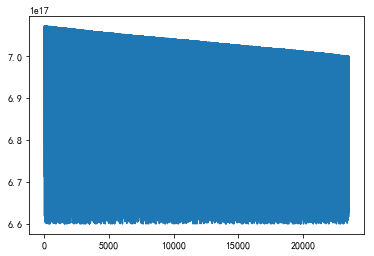

In [373]:
print(days)
days.plot()

In [374]:
# 各用户生命周期
life_circle = pd.to_datetime(user_buy_last) - pd.to_datetime(user_buy_first)
print(life_circle)
print('-' * 50)
print('-' * 50)
life_circle.describe()

用户
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
6         0 days
7       445 days
8       452 days
9       523 days
10        0 days
11      415 days
12        0 days
13        0 days
14        0 days
15        0 days
16      252 days
17        0 days
18        0 days
19      160 days
20       17 days
21       12 days
22        0 days
23        0 days
24      384 days
25      523 days
26       25 days
27        5 days
28       66 days
29      480 days
30       44 days
          ...   
23541     8 days
23542     0 days
23543     0 days
23544   305 days
23545     0 days
23546     0 days
23547    13 days
23548     0 days
23549     0 days
23550     0 days
23551   170 days
23552     9 days
23553     3 days
23554   313 days
23555   442 days
23556   439 days
23557     0 days
23558   337 days
23559    94 days
23560     0 days
23561   430 days
23562     0 days
23563   193 days
23564   250 days
23565     0 days
23566     0 days
23567     0 days
23568    28

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: 订单时间, dtype: object

Text(0.5, 1.0, '用户消费周期分布')

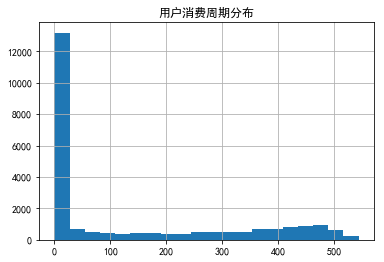

In [376]:
(life_circle/np.timedelta64(1, 'D')).hist(bins=20)
plt.title('用户消费周期分布')

In [ ]:
# 用户首次回购周期